# Interactive data visualisation with Python

_This work is licensed under a [Creative Commons BY-SA 4.0 License](http://creativecommons.org/licenses/by-sa/4.0/)_

<br><br><br><br>
__Daniel Kapitan__<br>
`e. d.kapitan@jads.nl`<br>
`w. https://kapitan.net`<br>



<img style="float: left" src="https://github.com/jads-nl/public-lectures/blob/main/logos/jads-gold-250x60.png?raw=true">




## The Python Visualisation Landscape

![](https://github.com/rougier/python-visualization-landscape/blob/master/landscape-colors.png?raw=true)

### Can't see the forest for the trees?
- [PyViz.org](https://pyviz.org/) attempts to shine light on common patterns and use cases, comparing or discussing multiple plotting libraries. Have a look at [Bence Arató's talk at EuroPython 2020 (30 min.)](https://youtu.be/35e0Chuxqi0) if you prefer a video.
- Use Wilkinson's [Grammar of Graphics](https://github.com/jads-nl/public-lectures/blob/main/visualisation/wilkinson2010grammar.pdf) and Wickham's extension of ggplot2 [Layered Grammar of Graphics](https://github.com/jads-nl/public-lectures/blob/main/visualisation/wickham2010layered-grammar.pdf) as the conceptual framework for understanding _how_ a good, interactive visualisations are build. 
- Go through the slides and online resources of Sara Sprinkhuizen's lecture on [Data visualisation](https://www.thedatavisionlab.com/blog/jads) to gain a better understanding _what_ makes a good data viz. This won't be covered in this lecture.

### Learning objectives

- Know how to apply a grammar of _interactions_ to make interactive charts with the most commonly used Python graphing libraries (bokeh, plotly, altair)
- Know how to make single-page apps in Jupyter notebook with the most commonly used Python dashboarding and analytic app libraries (panel, plotly dash)  

In [ ]:

[Plotly](https://plotly.com) is a set of libraries ...

## Plotly
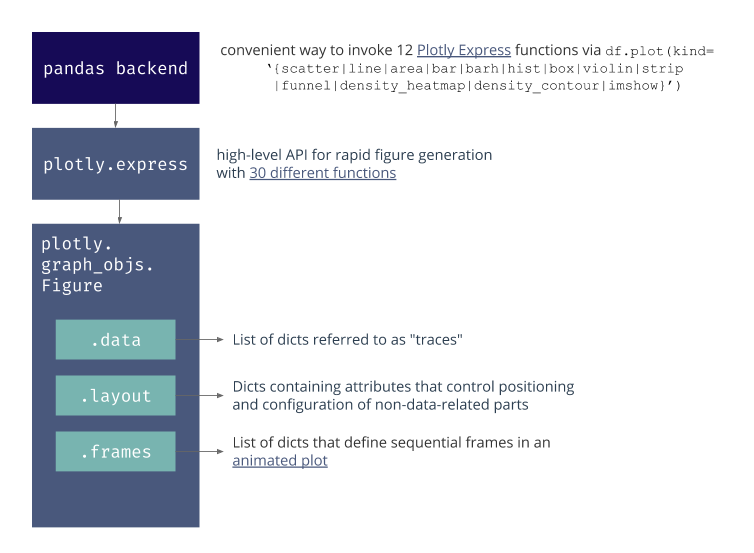



In [ ]:
import altair as alt
from vega_datasets import data

cars = data.cars.url

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
)

### pandas backend

With newest version you can access `plotly.express` directly from `pandas`.

- https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee
- https://plotly.com/python/plotly-express/
- https://plotly.com/python/pandas-backend/

In [ ]:
!pip install plotly==4.12.0
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

pd.options.plotting.backend = 'plotly'

In [ ]:
# Ames Housing dataset
ames = pd.read_csv('https://github.com/jads-nl/discover-projects/blob/main/ames-housing/AmesHousing.csv?raw=true')

In [ ]:
ames.SalePrice.hist()

### Express

#### Subplots
Plotly Express does not support arbitrary subplot capabilities, instead it supports faceting by a given data dimension, and it also supports marginal charts to display distribution information.

To make arbitrary subplots, use the lower-level `plotly.subplots` module and the `make_subplots` function.Plotly Express faceting uses make_subplots internally so adding traces to Plotly Express facets works just as documented here, with fig.add_trace(..., row=<R>, col=<C>).


Since `plotly.express` returns a `Figure` and `fig.add_trace` requires you to add traces, you can access the first trace of a figure with and add that to the subplot.

Composition is still under development in plotly, see these GitHub issues:
- [PX figure composition](https://github.com/plotly/plotly.py/issues/2647)
- [subplots with plotly express](https://github.com/plotly/plotly_express/issues/83)


In [ ]:
# subplots via px
fig = make_subplots(rows=1, cols=2)
fig.add_trace(ames.SalePrice.hist()._data[0], row=1, col=1)
fig.add_trace(ames['Year Built'].hist()._data[0], row=1, col =2)

# known issue: https://github.com/plotly/plotly.py/issues/2647#issuecomment-731562248
fig.update_traces(bingroup=None)

#### Animation: Gapminder in less than 10 lines of code

In [ ]:
gapminder = px.data.gapminder()
gapminder_animate = px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
gapminder_animate.show()

In [ ]:
df.head()

## Dash

![](https://storage.googleapis.com/hackersandslackers-cdn/2018/12/_retina/Dash@2x.jpg)

### [Layout](https://dash.plotly.com/layout)

- Use `div` to layout a page
- Each `div` can contain a `Figure` or a [Dash Core Component (`dcc`)](https://dash.plotly.com/dash-core-components) with 19 different interactive controls

### [Basic callbacks](https://dash.plotly.com/basic-callbacks)


### [Interactive graphing and cross-filtering](https://dash.plotly.com/interactive-graphing)

In [ ]:
!pip install jupyter-dash
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html

## Advanced usage and app development

- Single-Page Apps (SPAs) are do-able
- Beware when you are moving into advanced development territory
  - [Multi-page apps](https://dash.plotly.com/urls)
  - [Sharing data between callbacks](https://dash.plotly.com/sharing-data-between-callbacks): when your datasets get too large, you need to store it somewhere and keep track of state of your dataset. Note that [bokeh](https://bokeh.org) - as the other most commonly used interactive viz library - has better solutions for this with their [ColumnDataSource](https://docs.bokeh.org/en/latest/docs/user_guide/data.html) object
  - Working with callbacks does have limitations. If you notice that you need to nest callbacks (callback A -> callback B -> callback C -> final result), you are on your way to the Callback Hell a.k.a. the [Pyramid of Doom](https://javascript.info/callbacks#pyramid-of-doom). Stop and reconsider before continuing.
  

In [ ]:
df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')
available_indicators = df['Indicator Name'].unique()

In [ ]:

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Fertility rate, total (births per woman)'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Life expectancy at birth, total (years)'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-year--slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    return {
        'data': [dict(
            x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            mode='markers',
            marker={
                'size': 25,
                'opacity': 0.7,
                'color': 'orange',
                'line': {'width': 2, 'color': 'purple'}
            }
        )],
        'layout': dict(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 30, 't': 10, 'r': 0},
            height=450,
            hovermode='closest'
        )
    }


def create_time_series(dff, axis_type, title):
    return {
        'data': [dict(
            x=dff['Year'],
            y=dff['Value'],
            mode='lines+markers'
        )],
        'layout': {
            'height': 225,
            'margin': {'l': 20, 'b': 30, 'r': 10, 't': 10},
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False}
        }
    }


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

app.run_server(mode='external')
